In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold

In [36]:
# Generate random data for dogs and cats
np.random.seed(0)  # For reproducibility

In [37]:
# Dogs: higher ear flappiness index, lower whisker length
dogs_whisker_length = np.random.normal(loc=5, scale=1, size=10)
dogs_ear_flappiness_index = np.random.normal(loc=8, scale=1, size=10)

In [38]:
# Cats: lower ear flappiness index, higher whisker length
cats_whisker_length = np.random.normal(loc=8, scale=1, size=10)
cats_ear_flappiness_index = np.random.normal(loc=5, scale=1, size=10)

In [40]:
# Combine data
dogs_data = np.vstack((dogs_whisker_length, dogs_ear_flappiness_index)).T
cats_data = np.vstack((cats_whisker_length, cats_ear_flappiness_index)).T
data = np.vstack((dogs_data, cats_data))
labels = np.hstack((np.zeros(len(dogs_data)), np.ones(len(cats_data))))


In [41]:
labels

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

In [42]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)


In [16]:
X_test

array([[6.76405235, 8.14404357],
       [7.81281615, 6.20237985],
       [6.54563433, 5.15634897],
       [5.40015721, 9.45427351]])

In [43]:
X_train

array([[ 4.89678115,  8.3130677 ],
       [ 4.02272212,  8.33367433],
       [ 8.6536186 ,  5.37816252],
       [ 7.2408932 ,  8.12167502],
       [ 9.53277921,  4.61267318],
       [ 8.04575852,  6.23029068],
       [ 7.25783498,  3.01920353],
       [ 5.97873798,  8.76103773],
       [ 5.4105985 ,  7.14590426],
       [ 9.46935877,  4.69769725],
       [ 6.86755799,  8.44386323],
       [ 8.8644362 ,  4.11221425],
       [ 4.84864279,  7.79484174],
       [ 5.44701018,  5.15494743],
       [10.26975462,  4.65208785],
       [ 5.95008842,  9.49407907]])

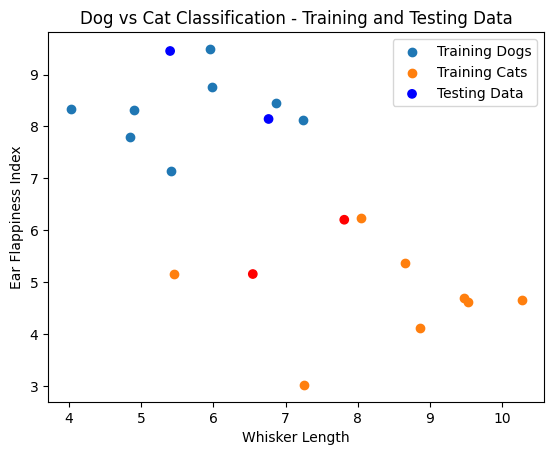

In [44]:
# Plot the training and testing data points
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], label='Training Dogs')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], label='Training Cats')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='bwr', label='Testing Data')
plt.xlabel('Whisker Length')
plt.ylabel('Ear Flappiness Index')
plt.title('Dog vs Cat Classification - Training and Testing Data')
plt.legend()
plt.show()



In [45]:
# Implementing random linear classifier algorithm
def random_linear_classifier(data_dogs, data_cats, k, d):
    best_error = float('inf')
    best_theta = None
    best_theta0 = None
    
    for _ in range(k):
        theta = np.random.normal(size=d)
        theta0 = np.random.normal()
        
        error = compute_error(data_dogs, data_cats, theta, theta0)
        
        if error < best_error:
            best_error = error
            best_theta = theta
            best_theta0 = theta0
    
    return best_theta, best_theta0, best_error

def compute_error(data_dogs, data_cats, theta, theta0):
    error = 0
    for x_dog in data_dogs:
        if np.dot(theta, x_dog) + theta0 <= 0:
            error += 1
    for x_cat in data_cats:
        if np.dot(theta, x_cat) + theta0 > 0:
            error += 1
    return error

In [53]:
# Define function for k-fold cross-validation
def cross_validate(data_dogs, data_cats, k_values, d, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    avg_errors = []

    for k in k_values:
        errors = []

        for train_index, val_index in kf.split(data_dogs):
            X_train_fold = np.vstack((data_dogs[train_index], data_cats[train_index]))
            y_train_fold = np.hstack((np.zeros(len(train_index)), np.ones(len(train_index))))
            X_val_fold = np.vstack((data_dogs[val_index], data_cats[val_index]))
            y_val_fold = np.hstack((np.zeros(len(val_index)), np.ones(len(val_index))))

            best_theta_fold, best_theta0_fold, error = random_linear_classifier(X_train_fold[y_train_fold == 0], 
                                                                                 X_train_fold[y_train_fold == 1], 
                                                                                 k, d)
            errors.append(compute_error(X_val_fold[y_val_fold == 0], X_val_fold[y_val_fold == 1], 
                                         best_theta_fold, best_theta0_fold))

        avg_errors.append(np.mean(errors))

    best_k = k_values[np.argmin(avg_errors)]
    return best_k

# Define k values to try
k_values = [1, 10, 50, 100, 200, 350]

best_k = cross_validate(dogs_data, cats_data, k_values, d=2)

print(f"Best value of k: {best_k}")


Best value of k: 200


In [54]:
# Run random linear classifier algorithm on training data
#k = 100  # Number of iterations
k=best_k
d = 2  # Number of features
best_theta_train, best_theta0_train, train_error = random_linear_classifier(X_train[y_train == 0], X_train[y_train == 1], k, d)


In [55]:
# Plot the decision boundary on training data
x_vals_train = np.linspace(2, 10, 100)
y_vals_train = (-best_theta_train[0] / best_theta_train[1]) * x_vals_train - (best_theta0_train / best_theta_train[1])


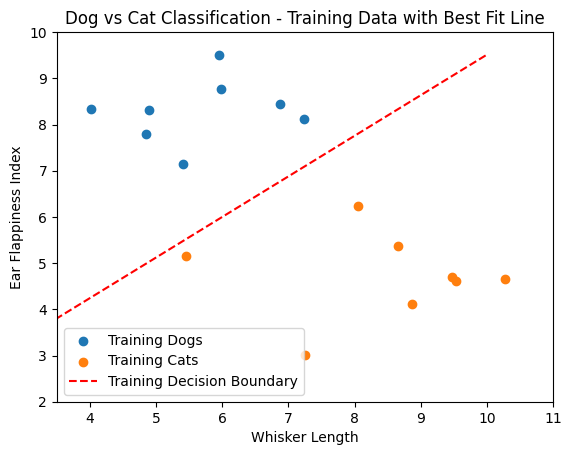

In [56]:
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], label='Training Dogs')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], label='Training Cats')
plt.plot(x_vals_train, y_vals_train, color='red', linestyle='--', label='Training Decision Boundary')
# Set same limits for x and y axes
plt.xlim([3.5, 11])
plt.ylim([2, 10])
plt.xlabel('Whisker Length')
plt.ylabel('Ear Flappiness Index')
plt.title('Dog vs Cat Classification - Training Data with Best Fit Line')
plt.legend()
plt.show()




In [57]:
print(f"Training Error: {train_error}")


Training Error: 0


In [58]:
# Compute testing error
test_error = compute_error(X_test[y_test == 0], X_test[y_test == 1], best_theta_train, best_theta0_train)
print(f"Testing Error: {test_error}")

Testing Error: 0


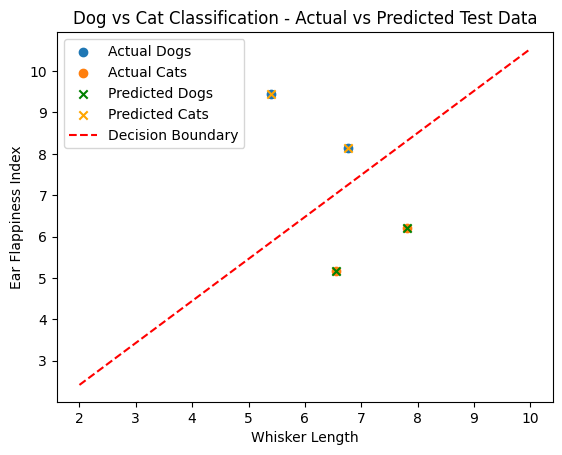

In [59]:
# Plot the actual test data and predicted test data
plt.scatter(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1], label='Actual Dogs')
plt.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], label='Actual Cats')

# Predict test data points using the decision boundary
predicted_labels = np.zeros_like(y_test)
for i, x_test in enumerate(X_test):
    if np.dot(best_theta_train, x_test) + best_theta0_train > 0:
        predicted_labels[i] = 1

# Plot predicted test data points
plt.scatter(X_test[predicted_labels == 0][:, 0], X_test[predicted_labels == 0][:, 1], marker='x', label='Predicted Dogs', color='green')
plt.scatter(X_test[predicted_labels == 1][:, 0], X_test[predicted_labels == 1][:, 1], marker='x', label='Predicted Cats', color='orange')

# Plot decision boundary
plt.plot(x_vals_test, y_vals_test, color='red', linestyle='--', label='Decision Boundary')

plt.xlabel('Whisker Length')
plt.ylabel('Ear Flappiness Index')
plt.title('Dog vs Cat Classification - Actual vs Predicted Test Data')
plt.legend()
plt.show()
